## **Titanic Project:**

This project uses Python to analyse the well-known Titanic test dataset, which gives name, sex, age, and survival, etc.

We are interested in finding out:

1. Who were the passengers on the Titanic? (Age, Class, etc.),
2. What deck were the passengers on? (and how that relates to their class),
3. Where did the passengers come from?
4. Who was alone and who was accompanied (e.g. with family, guardian, etc.)?

In turn we can answer the broader question:

5. What factors allowed someone to survive the sinking?

Credit for the project goes to Jose Portilla's Udemy course on data analysis and visualistion.

In [4]:
# First visualise all the data; import relevant modules
import pandas as pd 
from pandas import Series, DataFrame

titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

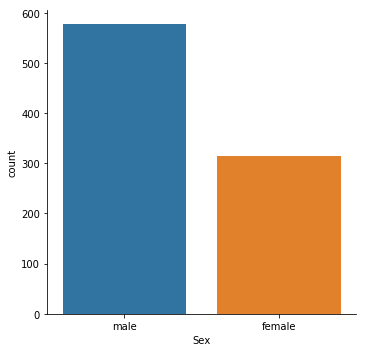

In [7]:
sns.catplot('Sex',data=titanic_df,kind="count")

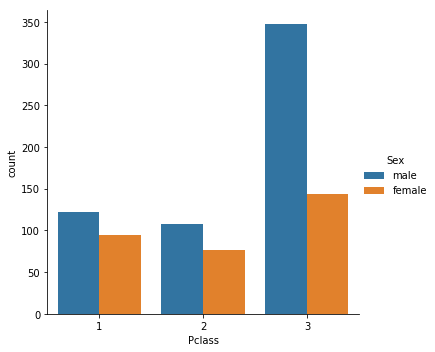

In [8]:
sns.catplot('Pclass',data=titanic_df,hue='Sex',kind='count')

In [9]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [10]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [11]:
titanic_df[0:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


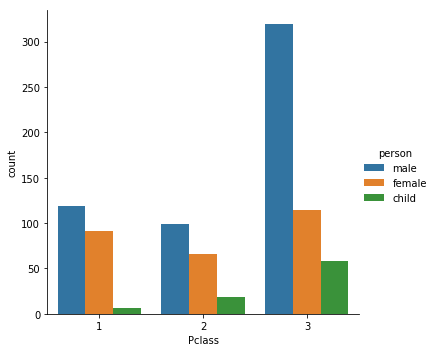

In [12]:
sns.catplot('Pclass',data=titanic_df,hue='person',kind='count')

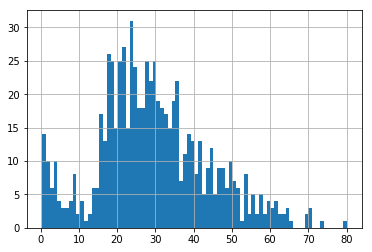

In [13]:
titanic_df['Age'].hist(bins=80)

In [14]:
titanic_df['Age'].mean()

29.69911764705882

In [15]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

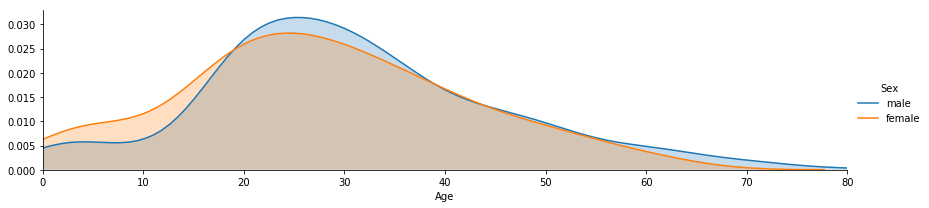

In [16]:
figure = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
figure.map(sns.kdeplot,'Age',shade=True)

figure.set(xlim=[0,titanic_df['Age'].max()])
figure.add_legend()

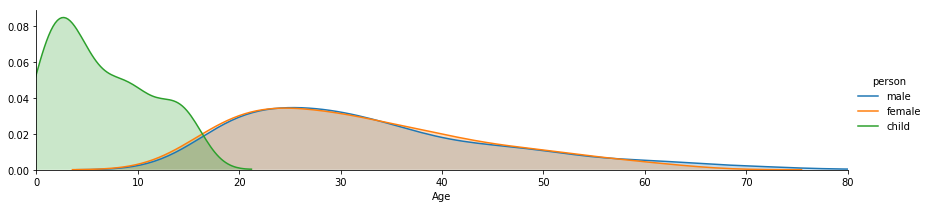

In [17]:
figure = sns.FacetGrid(titanic_df,hue='person',aspect=4)
figure.map(sns.kdeplot,'Age',shade=True)

figure.set(xlim=[0,titanic_df['Age'].max()])
figure.add_legend()

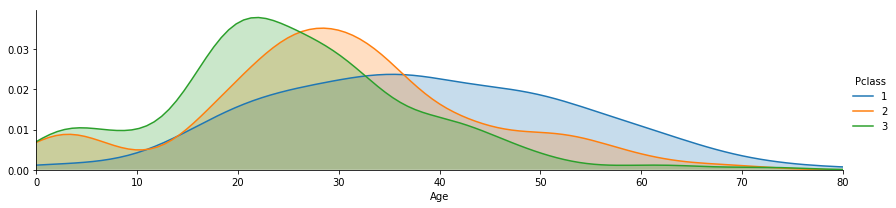

In [18]:
figure = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
figure.map(sns.kdeplot,'Age',shade=True)

figure.set(xlim=[0,titanic_df['Age'].max()])
figure.add_legend()

Question 1 has now been covered - we have gotten a good idea of how the age and sex distribution of passengers is distributed across 1st, 2nd, and 3rd class.

In [19]:
# Question 2 from here down.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [21]:
deck = titanic_df['Cabin'].dropna()
deck.head() # first 5 non-null decks

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

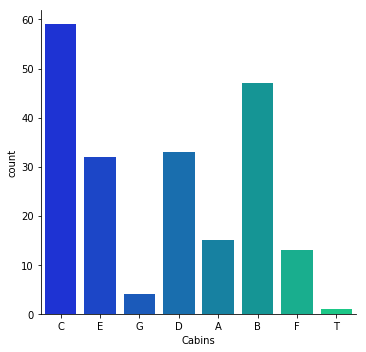

In [23]:
levels = [] #Finding rooms of passengers

for room in deck:
    levels.append(room[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabins']
sns.catplot('Cabins',data=cabin_df,palette='winter',kind="count")

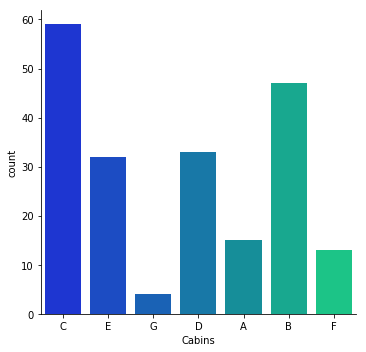

In [24]:
cabin_df = cabin_df[cabin_df.Cabins != 'T'] #reomve t as this doesn't make sense as a room letter
sns.catplot('Cabins',data=cabin_df,palette='winter',kind="count")

We can see now the distribution of passengers within each cabin letter. We now seek to answer where each passnger came from (that is, where they embarked from).

In [25]:
# Question 3.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


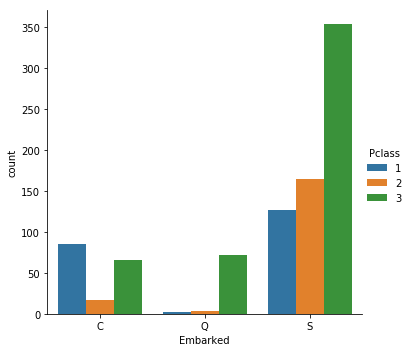

In [27]:
sns.catplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'],kind="count")

This is straightforward as we already have a column which tells us where the passengers embarked. Now we have to find out whether each passenger was alone, and how that relates to the broader question of whether or not a passenger survived the sinking.

In [28]:
# Question 4 from here
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [32]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

C:\Users\Andrew\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


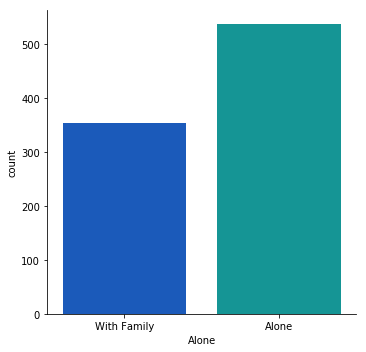

In [34]:
sns.catplot('Alone',data=titanic_df,kind='count',palette='winter')

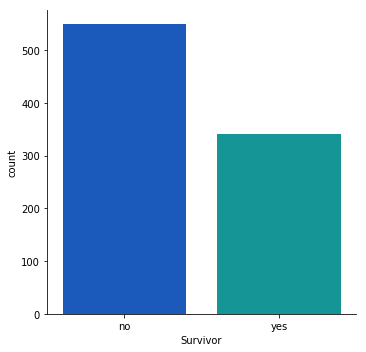

In [37]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})
sns.catplot('Survivor',data=titanic_df,palette='winter',kind='count')

These two bar graphs look nearly identical despite counting different factors. Obviously we cannot say for certain that having a family member present guaranteed survival, but it does have some historical credence (Women and children first was the general view held for who got to go on the lifeboats).

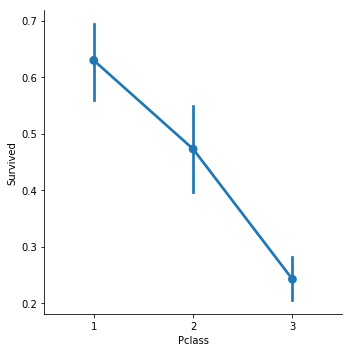

In [40]:
sns.catplot('Pclass','Survived',data=titanic_df,kind='point')

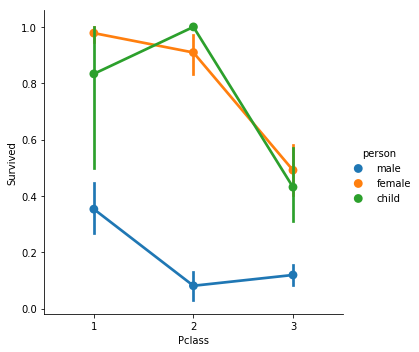

In [42]:
sns.catplot('Pclass','Survived',data=titanic_df,hue='person',kind='point')

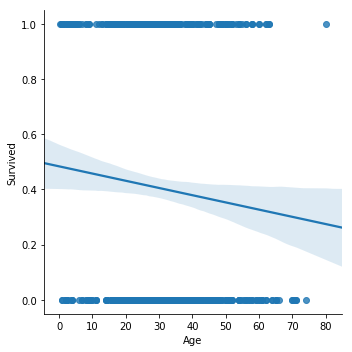

In [43]:
sns.lmplot('Age','Survived',data=titanic_df)

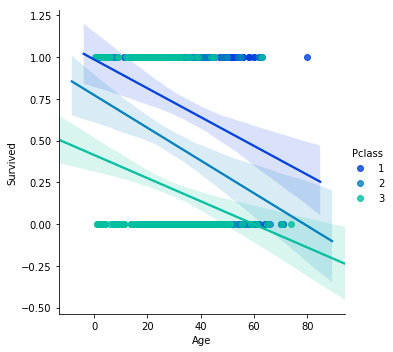

In [44]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',palette='winter')

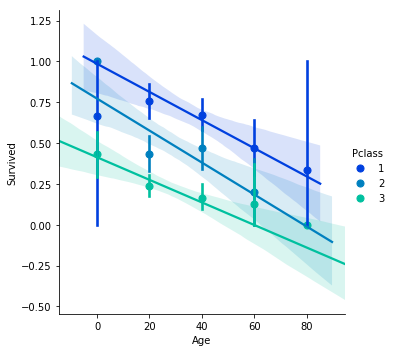

In [47]:
generations=[0,20,40,60,80]
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',palette='winter',x_bins=generations)

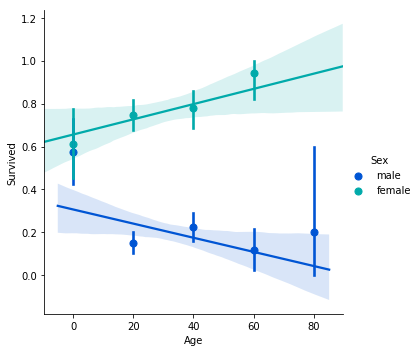

In [49]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Sex',palette='winter',x_bins=generations)

Running some linear regressions shows how the probability of surviving changes across age, and sex. We can make a few general observations:

1. Women and children have much higher probabilities of surviving than males
2. Being a female has a postive correlation between age and survival (that is, the older the woman, the likelier they were to survive).
3. Males have an negative correlation between survival and age.
4. Generally survival gets lower with Pclass (third class bein the cheapest has the lowest curvival rates for all sexes).